# Lab 1: Experiment Tracking
## Exercise 1: Introduction to CIFAR-10

The following code demonstrates training a simple [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html).

In [2]:
# install python packages
# %pip install -q tensorflow matplotlib

# import to use them
import tensorflow.keras as keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

### Download and Prepare the CIFAR-10 Dataset

The CIFAR-10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. We only use the training images because that's more than enough for our purposes.

For this workshop, we choose four classes and create a subset of the dataset. Feel free to change which classes are used!

In [3]:
# download the dataset
(images, labels), _ = keras.datasets.cifar10.load_data()

# there are 10 classes of images
all_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# choose four classes (feel free to change this!)
class_names = ["bird", "cat", "deer", "dog"]
print("Class names:", class_names)

# only keep images of these classes
class_indexes = [all_classes.index(c) for c in class_names]
to_keep = np.array([l in class_indexes for l in labels])
images = images[to_keep]
labels = labels[to_keep]

# change indexes from 10 to 2 classes
labels = np.array([class_indexes.index(l) for l in labels])

# normalize pixels between 0 and 1
images = images / 255.0

# split into train and test set
split = round(len(images) * 0.8)
train_images = images[:split]
train_labels = labels[:split]
test_images = images[split:]
test_labels = labels[split:]
print("Number of train images:", len(train_images))
print("Number of test images:", len(test_images))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Class names: ['bird', 'cat', 'deer', 'dog']
Number of train images: 16000
Number of test images: 4000


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


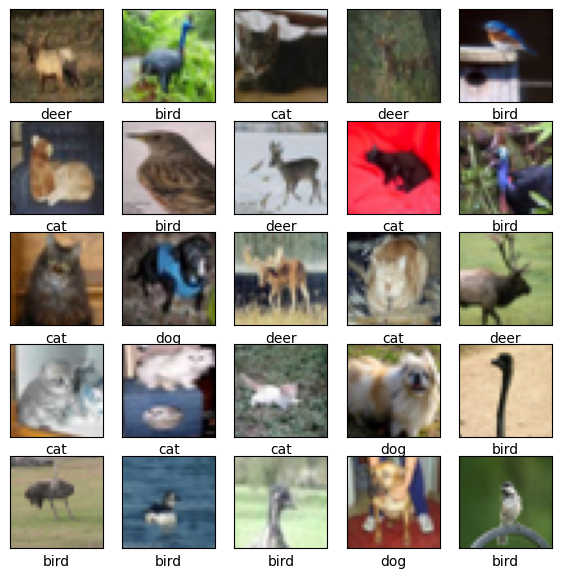

In [4]:
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Create convolutional neural network

The code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images.

In [5]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(32, 32, 3)))

model.add(layers.Conv2D(4, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation="relu"))


### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 8)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten the 3D output to 1D,  then add one or more Dense layers on top. We have 4 output classes, so you use a final Dense layer with 4 outputs.

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(4, activation="softmax"))

Here's the complete architecture of your model:

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 4)      │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 8)      │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,124 (12.20 KB)

 Trainable params: 3,124 (12.20 KB)

 Non-trainable params: 0 (0.00 B)

### Compile and train the model

In [8]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3104 - loss: 1.3631 - val_accuracy: 0.3957 - val_loss: 1.2776
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4400 - loss: 1.2259 - val_accuracy: 0.4550 - val_loss: 1.1921
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4680 - loss: 1.1798 - val_accuracy: 0.4560 - val_loss: 1.1797
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4885 - loss: 1.1524 - val_accuracy: 0.4762 - val_loss: 1.1625
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4977 - loss: 1.1317 - val_accuracy: 0.4717 - val_loss: 1.1665
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5224 - loss: 1.1004 - val_accuracy: 0.5035 - val_loss: 1.1223
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5204 - loss: 1.0923 - val_accuracy: 0.4988 - val_loss: 1.1218
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5217 - loss: 1.0917 - val_accuracy: 0.

### Evaluate the model

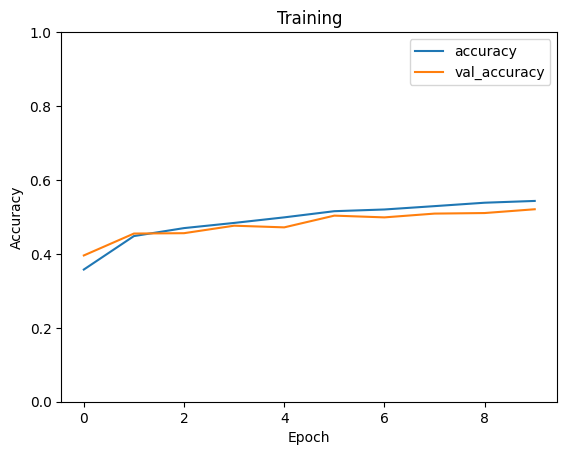

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.title("Training")
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(f"Test accuracy: {100 * test_acc:.2f} %")

125/125 - 0s - 1ms/step - accuracy: 0.5207 - loss: 1.1048
Test accuracy: 52.07 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


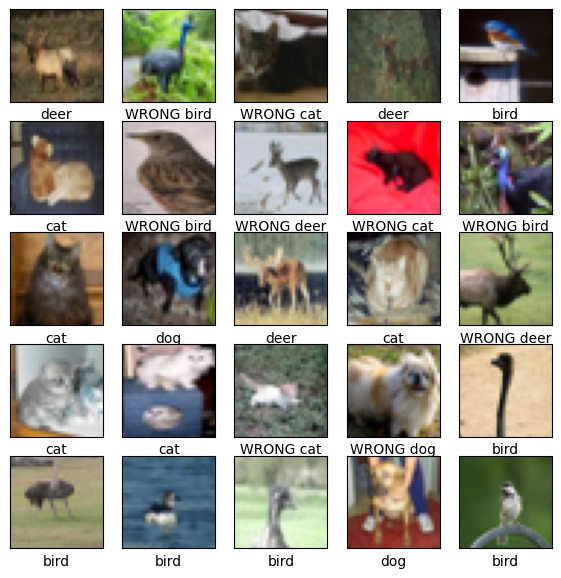

In [11]:
# show predictions
plt.figure(figsize=(7,7))
predictions = model.predict(train_images[:25])
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    predict = np.argmax(predictions[i])
    actual = train_labels[i]
    if predict == actual:
        plt.xlabel(f"{class_names[actual]}")
    else: # wrong prediction
        plt.xlabel(f"WRONG {class_names[actual]}")
plt.show()